## Scipy Signal Processing
Just a notebook for better learning how signal processsing, and Scipy functions for it actually work

Straight pulled from the Scipy Docs
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html#scipy.signal.spectrogram

In [3]:
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
import numpy as np

Generate a test signal, a 2 Vrms sine wave whose frequency is slowly modulated around 3kHz, corrupted by white noise of exponentially decreasing magnitude sampled at 10 kHz.

In [4]:
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

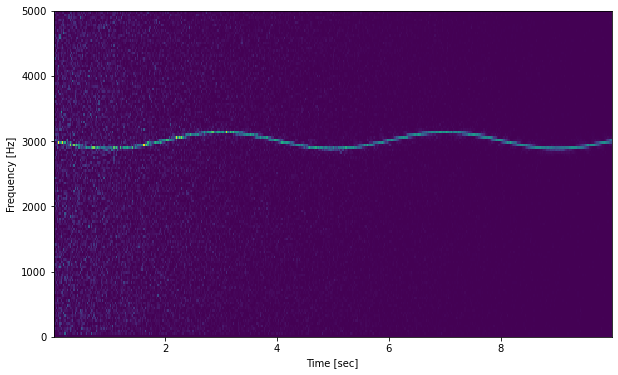

In [10]:
f, t, Sxx = signal.spectrogram(x, fs)
plt.figure(figsize=(10,6))
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()